# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dimas Arya Nurhakim
- **Email:** dimas.yans338@gmail.com
- **ID Dicoding:** Synnoer

## Menentukan Pertanyaan Bisnis

- What is the trend of product sales for each state?
- Which products are frequently purchased together in the same order?


## Mount Drive untuk Dataset

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [4]:
orders_df = pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
customers_df = pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order_items_df = pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
products_df = pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
category_translation = pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv")
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
geolocation_df = pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Orders Table: Tracks order processing from placement to delivery
- Customers Table: Identifies customers and their locations
- Orders Item Table: Tracks item in each order
- Product Table: Identifies product details
- Translation Table: English name of each categories
- Geolocation Table: Identifies the cities location using latitude and langitude

### Assessing Data

#### Order Table

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [38]:
print("Duplicate row: ", orders_df.duplicated().sum())

Duplicate row:  0


In [43]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Customer Table

In [23]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [37]:
print("Duplicate Row: ", customers_df.duplicated().sum())

Duplicate Row:  0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Order Item Table

In [25]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [39]:
print("Duplicate Row: ", order_items_df.duplicated().sum())

Duplicate Row:  0


In [42]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Product Table

In [86]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [87]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [67]:
print("Duplicate Row: ", products_df.duplicated().sum())

Duplicate Row:  0


In [68]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Category Translation Table

In [69]:
category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [70]:
category_translation.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [71]:
print("Duplicate Row: ", category_translation.duplicated().sum())

Duplicate Row:  0


In [77]:
category_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Geolocation Table

In [144]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [145]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [146]:
print("Duplicate Row: ", geolocation_df.duplicated().sum())

Duplicate Row:  261831


In [147]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### **Insight:**
- Duplicate row on geolocation table
- A missing value on Order table (Column: order_approved_at;
order_delivered_carrier_date; order_delivered_customer_date) and Product table
- The Data type for date is object
- Since the missing values on Order table are irrelevant to my questions, i chose to just drop the column instead.
- There's 8 order status, since my questions is about actual sales. I'll focus on orders with "delivered" status

### Cleaning Data

Dropping duplicates values

In [11]:
geolocation_df.drop_duplicates(inplace=True)

In [12]:
print("Duplicate Row: ", geolocation_df.duplicated().sum())

Duplicate Row:  0


Dropping irrelevant column with empty rows and for optimize runtime

In [13]:
orders_df = orders_df.drop(['order_approved_at', 'order_estimated_delivery_date', 'order_delivered_carrier_date', 'order_delivered_customer_date'], axis=1)

In [14]:
products_df = products_df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_height_cm'], axis=1)

In [15]:
geolocation_df = geolocation_df.drop(['geolocation_zip_code_prefix', 'geolocation_city'], axis=1)

In [16]:
order_items_df = order_items_df.drop(['seller_id','freight_value', 'shipping_limit_date'], axis=1)

Fix data type for relevant column

In [17]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])

Fill missing values

In [18]:
products_df.fillna(value="other", inplace=True)

<ipython-input-18-a728806a76f6>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="other", inplace=True)


## Exploratory Data Analysis (EDA)

### Explore Orders, Customers and Order Items Table for Questions 1

#### Merging Order table and Order Items table with (order_id), merging Order table and Customer table with (customer_id)

In [19]:
sales_df = orders_df.merge(order_items_df, on="order_id").merge(customers_df, on="customer_id")
sales_df = sales_df[sales_df["order_status"] == "delivered"]
sales_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Dont have enough resource on runtime

In [ ]:
sales_df = sales_df.merge(geolocation_df, left_on="customer_state", right_on="geolocation_state")
sales_df.head()

#### Using (order_purchase_timestamp) for trend analysis

Extract year-month for trend analysis

In [20]:
sales_df["order_purchase_month"] = pd.to_datetime(sales_df["order_purchase_timestamp"]).dt.to_period("M")

Aggregate sales per state and month

In [21]:
sales_trend = sales_df.groupby(["customer_state", "order_purchase_month"])['price'].sum().reset_index()

### Explore Order Items, Products and Category Translation Table for Questions 2

#### Merging Order Items table with Products table and Category Translation table with (product_id) and (product_category_name)

In [22]:
order_items = order_items_df.merge(products_df, on="product_id")
order_items = order_items.merge(category_translation, on="product_category_name", how="left")
order_items.head()

,order_id,order_item_id,product_id,price,product_category_name,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,30.0,garden_tools


Find frequently purchased products together

In [23]:
basket = order_items.groupby("order_id")["product_category_name_english"].apply(list)

Count product pairs

In [24]:
from collections import Counter
pairs = Counter()
for products in basket:
    for i in range(len(products)):
        for j in range(i+1, len(products)):
            pairs[(products[i], products[j])] += 1

In [25]:
pairs_df = pd.DataFrame(pairs.items(), columns=["Product Pair", "Count"])
pairs_df = pairs_df.sort_values(by="Count", ascending=False)
filtered_pairs = [(pair[0], pair[1]) for pair in pairs_df["Product Pair"] if pair[0] != pair[1]]

In [ ]:
category_pairs_counter = Counter()
for order_products in order_items.groupby("order_id")["product_category_name_english"].apply(list):
    unique_categories = list(set(order_products))
    for i in range(len(unique_categories)):
        for j in range(i + 1, len(unique_categories)):
            category_pairs_counter[(unique_categories[i], unique_categories[j])] += 1

In [27]:
filtered_pairs_df = pd.DataFrame(category_pairs_counter.items(), columns=["Category Pair", "Count"])
filtered_pairs_df = filtered_pairs_df.sort_values(by="Count", ascending=False)

print(filtered_pairs_df.head(10))

                        Category Pair  Count
22  (furniture_decor, bed_bath_table)     70
89     (home_confort, bed_bath_table)     43
28      (housewares, furniture_decor)     24
9                  (cool_stuff, baby)     20
3        (housewares, bed_bath_table)     20
1                        (toys, baby)     19
47             (bed_bath_table, baby)     17
45    (furniture_decor, garden_tools)     17
81    (health_beauty, sports_leisure)     14
38                  (housewares, nan)     14


**Insight:**
- Several category would benefit from close proximity placements or bundling as a pair

## Visualization & Explanatory Analysis

### Question 1:

Product Sales Trend by State

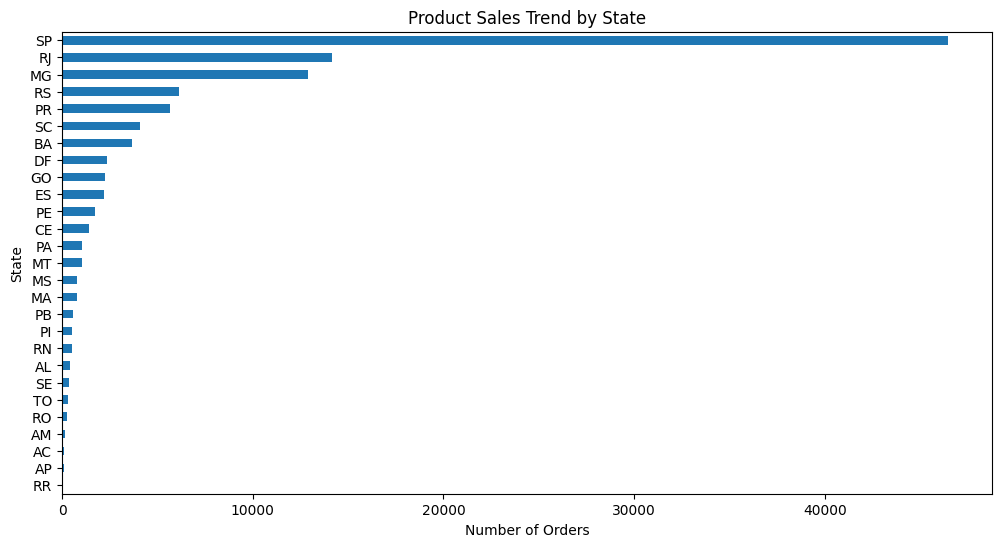

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
sales_df.groupby("customer_state")["order_id"].count().sort_values().plot(kind='barh', ax=ax)
plt.xlabel("Number of Orders")
plt.ylabel("State")
plt.title("Product Sales Trend by State")
plt.show()

Product Sales Trend by State every month

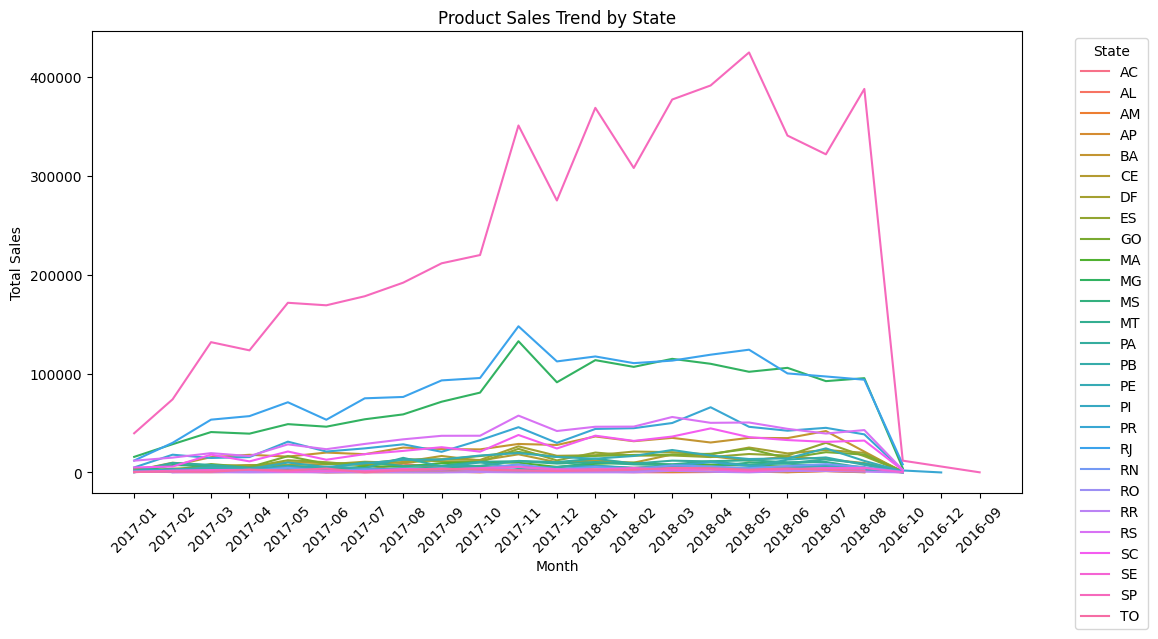

In [30]:
sales_trend['order_purchase_month'] = sales_trend['order_purchase_month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x="order_purchase_month", y="price", hue="customer_state")
plt.xticks(rotation=45)
plt.title("Product Sales Trend by State")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight:**
- SP is always the state with the most sales by a miles
- RJ and MG is the two other state that have significant amount of sales than others

### Question 2:

Product Category Pairs

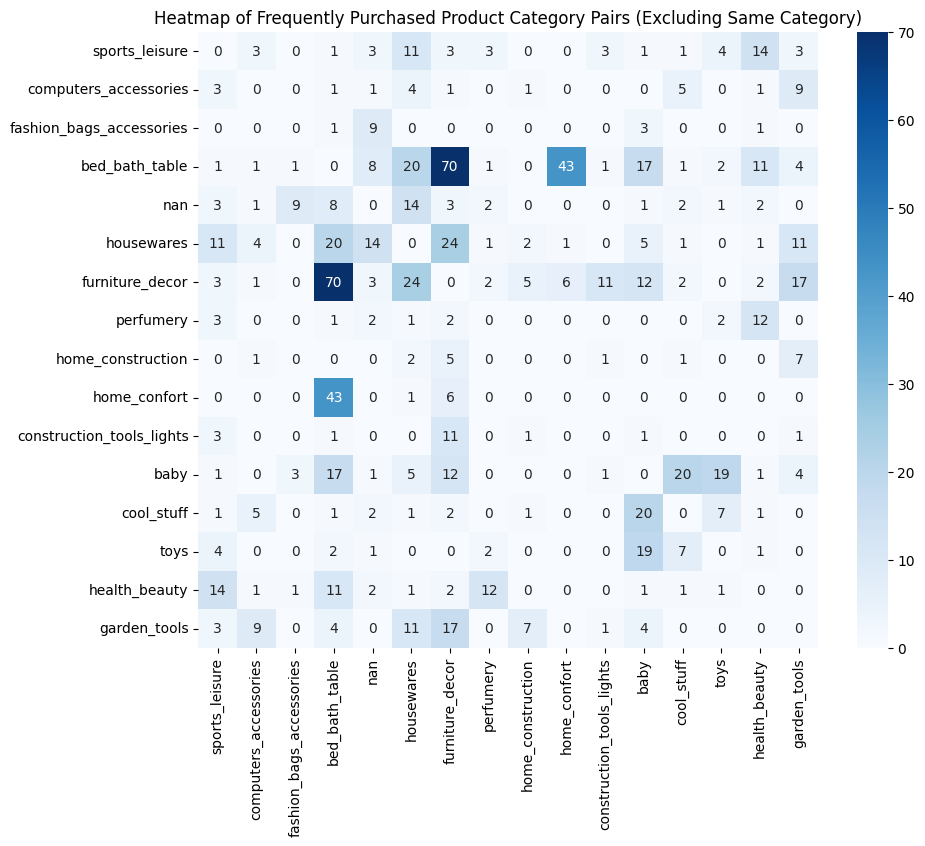

In [31]:
top_products = filtered_pairs_df.head(20)["Category Pair"].tolist()  # Use filtered_pairs_df
heatmap_data = pd.DataFrame(0,
                            index=list(set([p[0] for p in top_products] + [p[1] for p in top_products])),
                            columns=list(set([p[0] for p in top_products] + [p[1] for p in top_products])))

for (prod1, prod2), count in category_pairs_counter.items():  # Use category_pairs_counter
    if prod1 in heatmap_data.index and prod2 in heatmap_data.columns:
        heatmap_data.at[prod1, prod2] = count
        heatmap_data.at[prod2, prod1] = count

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap of Frequently Purchased Product Category Pairs (Excluding Same Category)")
plt.show()

Top 10 Product Category Pairs

<ipython-input-32-22f88c713df3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_pairs_df["Count"].head(10), y=pair_labels, palette="Blues_r")  # Use filtered_pairs_df


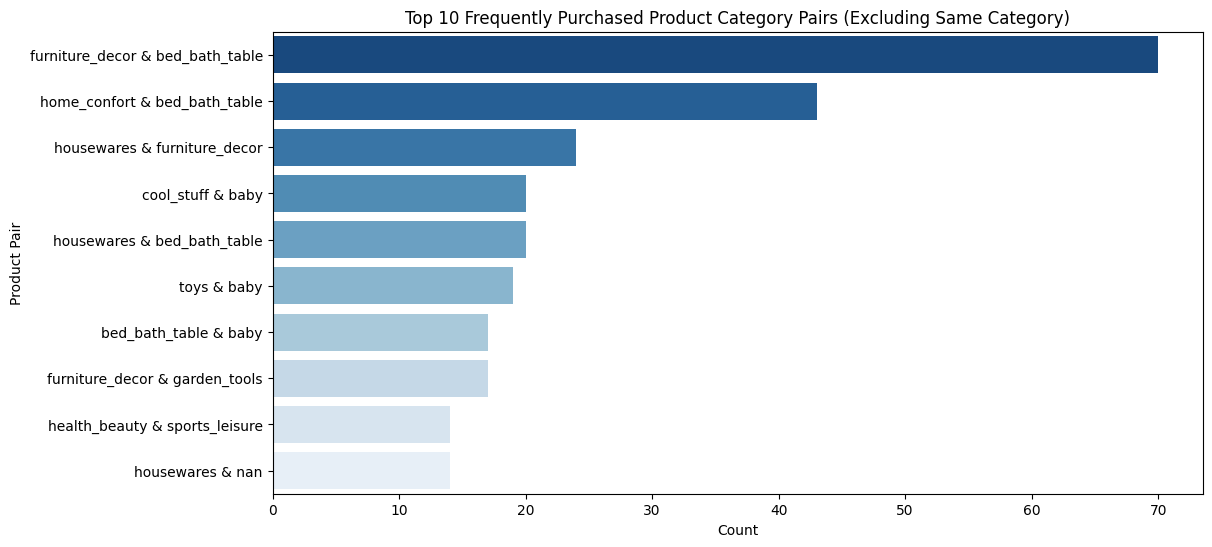

In [32]:
plt.figure(figsize=(12, 6))
pair_labels = [f"{pair[0]} & {pair[1]}" for pair in filtered_pairs_df["Category Pair"].head(10)]  # Use filtered_pairs_df
sns.barplot(x=filtered_pairs_df["Count"].head(10), y=pair_labels, palette="Blues_r")  # Use filtered_pairs_df
plt.xlabel("Count")
plt.ylabel("Product Pair")
plt.title("Top 10 Frequently Purchased Product Category Pairs (Excluding Same Category)")
plt.show()

**Insight:**
- Furniture Decor & Bed Bath Table is an excellent pair
- Home Comfort & Bed Bath Table is an excellent pair
- Housewares & Furniture is a good pair
- Cool Stuff & Baby stuff is a good pair

## Analisis Lanjutan (Opsional)

In [ ]:
geodf = gpd.GeoDataFrame(sales_df, geometry=gpd.points_from_xy(geolocation_df.geolocation_lng, geolocation_df.geolocation_lat))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 5))
world.plot(ax=ax, color='lightgrey')
geodf.plot(ax=ax, color='blue', markersize=5)
plt.title("Geospatial Distribution of Sellers")
plt.show()

## Conclusion

## What is the trend of product sales for each state?
- Sao Paulo (SP) dominates sales by a significant margin, indicating it as the primary market for the business.
- Rio de Janeiro (RJ) and Minas Gerais (MG) also have strong sales numbers, but they lag behind SP. These states could still be considered as secondary key markets.
- Other states show relatively lower sales volume.
- Expand on SP, RJ and MG should be prioritize.


## Which products are frequently purchased together in the same order?
- Furniture Decor & Bed Bath Table is a highly frequent combination, indicating that customers tend to buy home-related items in sets.
- Home Comfort & Bed Bath Table follows a similar pattern, reinforcing the demand for bundled home essentials.
- Housewares & Furniture is another good pair, suggesting customers prefer to buy multiple household-related items together.
- Cool Stuff & Baby Stuff is a common pair, indicating parents might be buying entertaining or useful items along with baby essentials.
- Product bundling and placement strategies can be implemented for home decor, furniture, and household items to boost sales.